In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import cv2 as cv
import PIL
import tensorflow as tf
import keras as keras
from keras import layers
from keras.layers import Dense,Flatten
from keras.models import Sequential
from keras.optimizers.adam import Adam
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.utils import shuffle
from keras.callbacks import CSVLogger

In [ ]:
!unzip /content/drive/MyDrive/dataset2.zip

collecting the data

In [ ]:
datagen=keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
train_path="/content/dataset/train"
test_path="/content/dataset/test"
nums=2560
nums2=200
train_data=datagen.flow_from_directory(
    train_path,
    batch_size=nums,
    class_mode="categorical",
    shuffle=True
)
test_data=datagen.flow_from_directory(
    test_path,
    batch_size=nums2,
    class_mode="categorical",
    shuffle=True
)

Found 2560 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


encoding the labels

In [ ]:
x_train,y_train=train_data.next()
x_test,y_test=test_data.next()
keras.applications.inception_v3.preprocess_input(
    x_train, data_format=None
)
keras.applications.inception_v3.preprocess_input(
    x_test, data_format=None
)


array([[[[-0.99886197, -0.9986467 , -0.9981546 ],
         [-0.99830836, -0.9976932 , -0.9974164 ],
         [-0.9987082 , -0.9978162 , -0.9976932 ],
         ...,
         [-0.99941564, -0.9991695 , -0.999108  ],
         [-0.99941564, -0.9991695 , -0.999108  ],
         [-0.99947715, -0.99923104, -0.9991695 ]],

        [[-0.9981546 , -0.99772394, -0.9973856 ],
         [-0.99846214, -0.99784696, -0.99763167],
         [-0.99852365, -0.9977547 , -0.99763167],
         ...,
         [-0.9993541 , -0.999108  , -0.9990465 ],
         [-0.9993849 , -0.9991388 , -0.99907726],
         [-0.9995079 , -0.9992618 , -0.9992003 ]],

        [[-0.9982776 , -0.9976932 , -0.99750865],
         [-0.99852365, -0.99778545, -0.99772394],
         [-0.9982161 , -0.9976624 , -0.9976009 ],
         ...,
         [-0.99941564, -0.9991695 , -0.999108  ],
         [-0.9993233 , -0.99907726, -0.99901575],
         [-0.99941564, -0.9991695 , -0.999108  ]],

        ...,

        [[-0.9965859 , -0.9961553 , -0

In [ ]:
print(x_train[0].shape)

(256, 256, 3)


the model

In [ ]:
inceptionv3_model=Sequential()
pretrained_model=keras.applications.InceptionV3(include_top=False,input_shape=(256,256,3),pooling="avg",weights="imagenet")
for layer in pretrained_model.layers:
    layer.trainable=False
inceptionv3_model.add(pretrained_model)
inceptionv3_model.add(Flatten())
inceptionv3_model.add(Dense(1024,activation="relu"))
inceptionv3_model.add(tf.keras.layers.BatchNormalization())
inceptionv3_model.add(tf.keras.layers.Dropout(0.4, noise_shape=None, seed=None))
inceptionv3_model.add(Dense(512,activation="relu"))
inceptionv3_model.add(tf.keras.layers.BatchNormalization())
inceptionv3_model.add(tf.keras.layers.Dropout(0.4, noise_shape=None, seed=None))
inceptionv3_model.add(Dense(2,activation="sigmoid"))
inceptionv3_model.build(input_shape=(None,256,256,3))
print(inceptionv3_model.summary())



87910968/87910968 [==============================] - 5s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2048)              21802784  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 batch_normalization_94 (Bat  (None, 1024)             4096      
 chNormalization)                                                
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               52

training the model

In [ ]:
inceptionv3_model.compile(optimizer=Adam(learning_rate=0.0001),loss="binary_crossentropy",metrics=["accuracy"])
# csv_logger = CSVLogger('training.log')
# inceptionv3_model.fit(x=x_train,y=y_train,validation_split=0.1,batch_size=10,epochs=100,shuffle=True,verbose=2,callbacks=[csv_logger])
# inceptionv3_model.save_weights("model.h5")
# # Y=Y.toarray()
inceptionv3_model.load_weights("/content/drive/MyDrive/inceptionnet.h5")

testing the model

In [ ]:
pred = inceptionv3_model.predict(x=x_test,batch_size=10,verbose=2)
score = inceptionv3_model.evaluate(x_test,y_test, verbose = 2)

20/20 - 6s - 6s/epoch - 288ms/step
7/7 - 5s - loss: 0.6648 - accuracy: 0.7750 - 5s/epoch - 652ms/step


In [ ]:
!unzip /content/drive/MyDrive/test_filter.zip

Archive:  /content/drive/MyDrive/test_filter.zip
   creating: test_filter/bilateral_blur/
   creating: test_filter/bilateral_blur/bb5_100/
   creating: test_filter/bilateral_blur/bb5_100/authentic/
  inflating: test_filter/bilateral_blur/bb5_100/authentic/Au_ani_0026.jpg  
  inflating: test_filter/bilateral_blur/bb5_100/authentic/Au_ani_0027.jpg  
  inflating: test_filter/bilateral_blur/bb5_100/authentic/Au_ani_0028.jpg  
  inflating: test_filter/bilateral_blur/bb5_100/authentic/Au_ani_0029.jpg  
  inflating: test_filter/bilateral_blur/bb5_100/authentic/Au_ani_0030.jpg  
  inflating: test_filter/bilateral_blur/bb5_100/authentic/Au_ani_0031.jpg  
  inflating: test_filter/bilateral_blur/bb5_100/authentic/Au_ani_0032.jpg  
  inflating: test_filter/bilateral_blur/bb5_100/authentic/Au_ani_0033.jpg  
  inflating: test_filter/bilateral_blur/bb5_100/authentic/Au_ani_0034.jpg  
  inflating: test_filter/bilateral_blur/bb5_100/authentic/Au_ani_0035.jpg  
  inflating: test_filter/bilateral_blur/bb

In [ ]:
num=200
datagen=keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
bb5_30="/content/test_filter/bilatera_blur/bb5_30"
bb1=datagen.flow_from_directory(
    bb5_30,
    batch_size=num,
    class_mode="categorical",
    shuffle=True
)
bb5_50="/content/test_filter/bilatera_blur/bb5_50"
bb2=datagen.flow_from_directory(
    bb5_50,
    batch_size=num,
    class_mode="categorical",
    shuffle=True
)
bb5_100="/content/test_filter/bilatera_blur/bb5_100"
bb3=datagen.flow_from_directory(
    bb5_100,
    batch_size=num,
    class_mode="categorical",
    shuffle=True
)
bb1_x,bb1_y=bb1.next()
keras.applications.resnet_v2.preprocess_input(
    bb1_x, data_format=None
)
bb2_x,bb2_y=bb2.next()
keras.applications.resnet_v2.preprocess_input(
    bb2_x, data_format=None
)
bb3_x,bb3_y=bb1.next()
keras.applications.resnet_v2.preprocess_input(
    bb3_x, data_format=None
)
Gb1="/content/test_filter/gaussian_blur/3_X_3"
gb1=datagen.flow_from_directory(
    Gb1,
    batch_size=num,
    class_mode="categorical",
    shuffle=True
)
Gb2="/content/test_filter/gaussian_blur/5_X_5"
gb2=datagen.flow_from_directory(
    Gb2,
    batch_size=num,
    class_mode="categorical",
    shuffle=True
)
gb1_X,gb1_y=bb2.next()
keras.applications.resnet_v2.preprocess_input(
    gb1_x, data_format=None
)
gb2_x,gb2_y=bb1.next()
keras.applications.resnet_v2.preprocess_input(
    gb2_x, data_format=None
)

Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


array([[[[-0.99686277, -0.9964629 , -0.99600154],
         [-0.9967705 , -0.99633986, -0.99584776],
         [-0.9967705 , -0.99627835, -0.9957555 ],
         ...,
         [-0.9966474 , -0.9979392 , -0.9983391 ],
         [-0.99695504, -0.9982161 , -0.99867743],
         [-0.9973241 , -0.9984929 , -0.99895424]],

        [[-0.99695504, -0.9964629 , -0.9961553 ],
         [-0.99686277, -0.9964629 , -0.9960323 ],
         [-0.99701655, -0.99655515, -0.9960323 ],
         ...,
         [-0.9974779 , -0.9983699 , -0.99880046],
         [-0.99757016, -0.99852365, -0.99895424],
         [-0.99757016, -0.99852365, -0.99886197]],

        [[-0.9970473 , -0.9965859 , -0.9963091 ],
         [-0.9969858 , -0.9965244 , -0.9961553 ],
         [-0.9969243 , -0.99649364, -0.9960323 ],
         ...,
         [-0.9977547 , -0.99858516, -0.9988927 ],
         [-0.99778545, -0.99867743, -0.9988927 ],
         [-0.99784696, -0.9987082 , -0.99886197]],

        ...,

        [[-0.9930181 , -0.9931411 , -0

In [ ]:
score = inceptionv3_model.evaluate(bb1_x,bb1_y, verbose = 2)
score = inceptionv3_model.evaluate(bb2_x,bb2_y, verbose = 2)
score = inceptionv3_model.evaluate(bb3_x,bb3_y, verbose = 2)
score = inceptionv3_model.evaluate(gb1_x,gb1_y, verbose = 2)
score = inceptionv3_model.evaluate(gb2_x,gb2_y, verbose = 2)

7/7 - 13s - loss: 0.6020 - accuracy: 0.8100 - 13s/epoch - 2s/step
7/7 - 1s - loss: 0.6823 - accuracy: 0.7950 - 553ms/epoch - 79ms/step


In [ ]:
WA_3="/content/test_filter/wieghted_average/WA3"
wa3=datagen.flow_from_directory(
    WA_3,
    batch_size=num,
    class_mode="categorical",
    shuffle=True
)
WA_5="/content/test_filter/wieghted_average/WA5"
wa5=datagen.flow_from_directory(
    WA_5,
    batch_size=num,
    class_mode="categorical",
    shuffle=True
)
wa3_x,wa3_y=wa3.next()
keras.applications.resnet_v2.preprocess_input(
    wa3_x, data_format=None
)
wa5_x,wa5_y=wa5.next()
keras.applications.resnet_v2.preprocess_input(
    wa5_x, data_format=None
)

Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


array([[[[-0.9941869 , -0.9941869 , -0.9941869 ],
         [-0.99412537, -0.99412537, -0.99412537],
         [-0.99409455, -0.99409455, -0.99409455],
         ...,
         [-0.99381775, -0.99381775, -0.99375623],
         [-0.9938485 , -0.9938485 , -0.993787  ],
         [-0.9939408 , -0.9939408 , -0.99387926]],

        [[-0.99421763, -0.99421763, -0.99421763],
         [-0.9941561 , -0.9941561 , -0.9941561 ],
         [-0.99409455, -0.99409455, -0.99409455],
         ...,
         [-0.993787  , -0.993787  , -0.9937255 ],
         [-0.9938485 , -0.9938485 , -0.993787  ],
         [-0.9939408 , -0.9939408 , -0.99387926]],

        [[-0.9942484 , -0.9942484 , -0.9942484 ],
         [-0.9941869 , -0.9941869 , -0.9941869 ],
         [-0.99412537, -0.99412537, -0.99412537],
         ...,
         [-0.993787  , -0.993787  , -0.9937255 ],
         [-0.99381775, -0.99381775, -0.99375623],
         [-0.99391   , -0.99391   , -0.9938485 ]],

        ...,

        [[-0.9941869 , -0.99606305, -0

In [ ]:
!cp -r "model.h5" "/content/drive/MyDrive"

In [ ]:
score = inceptionv3_model.evaluate(wa3_x,wa3_y, verbose = 2)
score = inceptionv3_model.evaluate(wa5_x,wa5_y, verbose = 2)

7/7 - 1s - loss: 0.5501 - accuracy: 0.8250 - 652ms/epoch - 93ms/step
7/7 - 1s - loss: 0.6056 - accuracy: 0.8050 - 564ms/epoch - 81ms/step


In [ ]:
KG_3="/content/test_filter/kuwahara/gaussian/3_X_3"
kg3=datagen.flow_from_directory(
    KG_3,
    batch_size=num,
    class_mode="categorical",
    shuffle=True
)
kg3_x,kg3_y=kg3.next()
keras.applications.resnet_v2.preprocess_input(
    kg3_x, data_format=None
)
KG_5="/content/test_filter/kuwahara/gaussian/5_X_5"
kg5=datagen.flow_from_directory(
    KG_5,
    batch_size=num,
    class_mode="categorical",
    shuffle=True
)
kg5_x,kg5_y=kg5.next()
keras.applications.resnet_v2.preprocess_input(
    kg5_x, data_format=None
)
KM_3="/content/test_filter/kuwahara/mean/3_X_3"
km3=datagen.flow_from_directory(
    KM_3,
    batch_size=num,
    class_mode="categorical",
    shuffle=True
)
km3_x,km3_y=km3.next()
keras.applications.resnet_v2.preprocess_input(
    km3_x, data_format=None
)
KM_5="/content/test_filter/kuwahara/mean/5_X_5"
km5=datagen.flow_from_directory(
    KM_5,
    batch_size=num,
    class_mode="categorical",
    shuffle=True
)
km5_x,km5_y=km5.next()
keras.applications.resnet_v2.preprocess_input(
    km5_x, data_format=None
)

Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


array([[[[-0.9987697 , -0.99873894, -0.99880046],
         [-0.9993849 , -0.99941564, -0.9997232 ],
         [-0.99941564, -0.99953866, -0.9996309 ],
         ...,
         [-0.9984929 , -0.9984929 , -0.9991695 ],
         [-0.99867743, -0.9986467 , -0.99923104],
         [-0.9987082 , -0.9986159 , -0.9991695 ]],

        [[-0.9988312 , -0.99873894, -0.99923104],
         [-0.99880046, -0.9987082 , -0.9992003 ],
         [-0.9993541 , -0.99947715, -0.9996002 ],
         ...,
         [-0.9984929 , -0.9984929 , -0.9991695 ],
         [-0.99907726, -0.99886197, -0.9993233 ],
         [-0.999108  , -0.9988927 , -0.9993233 ]],

        [[-0.998985  , -0.9989235 , -0.9994464 ],
         [-0.9989235 , -0.9988312 , -0.9994464 ],
         [-0.99873894, -0.9987082 , -0.9993849 ],
         ...,
         [-0.9984929 , -0.9984314 , -0.999108  ],
         [-0.99867743, -0.9984929 , -0.9991388 ],
         [-0.9990465 , -0.99886197, -0.9993233 ]],

        ...,

        [[-0.99852365, -0.9982776 , -0

In [ ]:
score = inceptionv3_model.evaluate(kg3_x,kg3_y, verbose = 2)
score = inceptionv3_model.evaluate(kg5_x,kg5_y, verbose = 2)
score = inceptionv3_model.evaluate(km3_x,km3_y, verbose = 2)
score = inceptionv3_model.evaluate(km5_x,km5_y, verbose = 2)

7/7 - 1s - loss: 0.5687 - accuracy: 0.8250 - 636ms/epoch - 91ms/step
7/7 - 1s - loss: 0.5866 - accuracy: 0.8300 - 573ms/epoch - 82ms/step
7/7 - 1s - loss: 0.5831 - accuracy: 0.8300 - 558ms/epoch - 80ms/step
7/7 - 1s - loss: 0.6738 - accuracy: 0.7800 - 570ms/epoch - 81ms/step


plotting confusion matrix

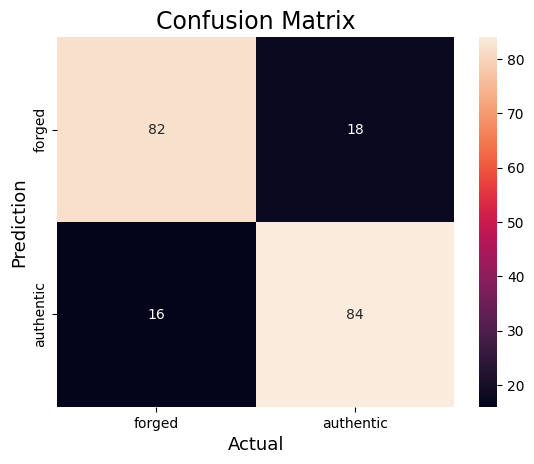

In [ ]:
from sklearn.metrics import confusion_matrix
# pred2 =pred
import numpy as np
import seaborn as sns
y_test=np.argmax(y_test, axis=-1)
pred=np.argmax(pred,axis=-1)
# print(pred)
# print(test_labels)
labels1 = [0,1]
cm = confusion_matrix(y_test,pred,labels=labels1)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['forged','authentic'],
            yticklabels=['forged','authentic'])
# print(cm)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()